In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [35]:
train = pd.read_csv('train.csv')

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Missing values remove

Missing value in 19 columns and no missing value in 62 columns


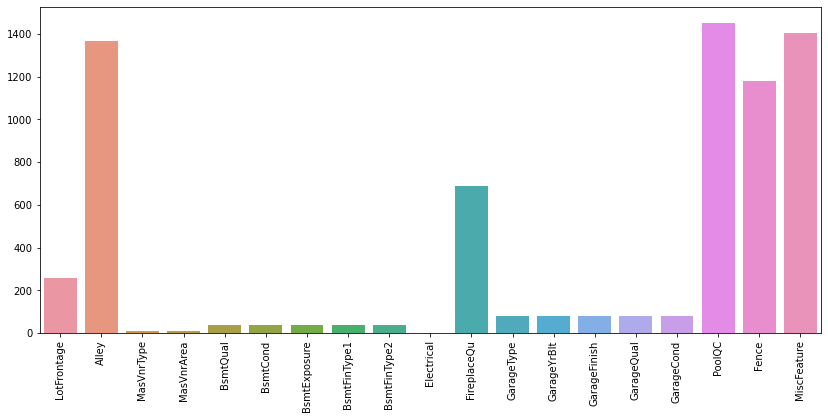

In [38]:
no_missing_col = [c for c in train.columns if train[c].isnull().sum() ==0]
missing_col = [c for c in train.columns if train[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = train[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

In [39]:
new_train = train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],1)

Missing value in 14 columns and no missing value in 62 columns


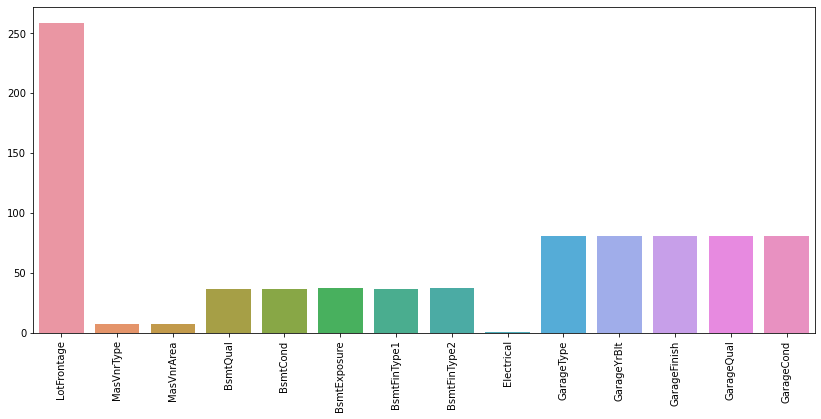

In [40]:
no_missing_col = [c for c in new_train.columns if new_train[c].isnull().sum() ==0]
missing_col = [c for c in new_train.columns if new_train[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = new_train[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

In [41]:
new_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

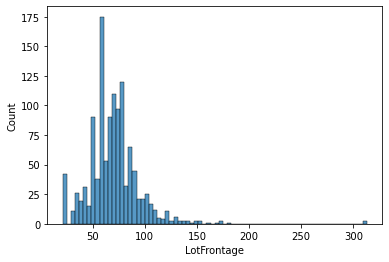

In [42]:
sns.histplot(data = new_train,x = new_train['LotFrontage'])

#### Missing values imputation

In [43]:
new_train['LotFrontage'] = new_train['LotFrontage'].fillna(value=new_train['LotFrontage'].mean())
new_train['MasVnrType'] = new_train['MasVnrType'].replace('None','BrkFace')
new_train['MasVnrType'] = new_train['MasVnrType'].fillna('BrkFace')
new_train['MasVnrArea'] = new_train['MasVnrArea'].fillna(value=new_train['MasVnrArea'].mean())
new_train['BsmtQual'] = new_train['BsmtQual'].fillna('TA')
new_train['BsmtCond'] = new_train['BsmtCond'].fillna('TA')
new_train['BsmtExposure'] = new_train['BsmtExposure'].fillna('No')
new_train['BsmtFinType1'] = new_train['BsmtFinType1'].fillna('Unf')
new_train['BsmtFinType2'] = new_train['BsmtFinType2'].fillna('Unf')
new_train['Electrical'] = new_train['Electrical'].fillna('SBrkr')
new_train['GarageType'] = new_train['GarageType'].fillna('Attchd')
new_train['GarageYrBlt'] = new_train['GarageYrBlt'].fillna(2005.0)
new_train['GarageFinish'] = new_train['GarageFinish'].fillna('Unf')
new_train['GarageQual'] = new_train['GarageQual'].fillna('TA')
new_train['GarageCond'] = new_train['GarageCond'].fillna('TA')

In [44]:
new_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

#### Removing duplicates

In [45]:
print(f"number of rows befor removing duplicates {new_train.shape[0]}")

number of rows befor removing duplicates 1460


In [46]:
new_train.drop_duplicates(keep = False, inplace = True)

In [47]:
print(f"number of rows after removing duplicates {new_train.shape[0]}")

number of rows after removing duplicates 1460


Since the number of rows remains the same no duplicates are found in the dataframe

#### Encoding

In [48]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [49]:
y_train = new_train.loc[:,'SalePrice']
X_train = new_train.iloc[:,:-1]
categorical = X_train.select_dtypes(exclude = np.number)
numerical = X_train.select_dtypes(include = np.number)
categorical.columns,print(f'categorical features : {len(categorical.columns)}'),numerical.columns,print(f'numerical features : {len(numerical.columns)}')

categorical features : 38
numerical features : 37


(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'),
 None,
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fi

In [50]:
categorical= pd.get_dummies(categorical)
X_train_dummies = pd.concat([numerical,categorical],1)
X_train_dummies.shape

(1460, 270)

#### Feature selection using Filter method

<AxesSubplot:>

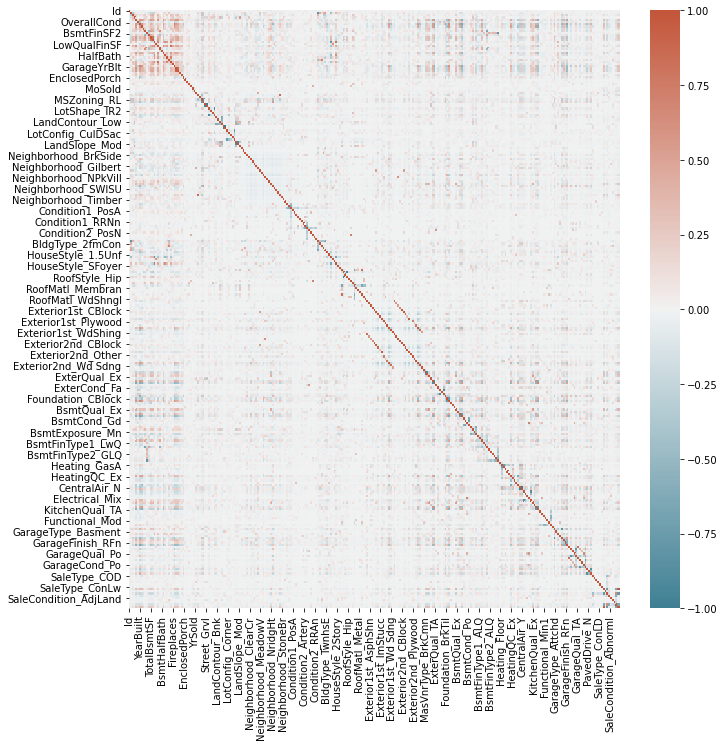

In [51]:
corrmat = X_train_dummies.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig = plt.figure(figsize=(11,11))

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

there are too many columns to identify the correlated features from the plot, hence we will code to remove the features based on certain threshold

In [52]:
def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = []
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                #print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[i]
                
                # and add it to our correlated set
                col_corr.append(colname)
                
    return col_corr

In [53]:
#correlated features with 0.6 threshold
correlation(X_train_dummies,0.6), len(correlation(X_train_dummies,0.6))

(['1stFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'TotRmsAbvGrd',
  'TotRmsAbvGrd',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'MSZoning_RM',
  'Street_Pave',
  'LotShape_Reg',
  'LandContour_Lvl',
  'Utilities_NoSeWa',
  'LotConfig_Inside',
  'LandSlope_Mod',
  'Neighborhood_Somerst',
  'Condition1_Norm',
  'Condition2_Norm',
  'BldgType_1Fam',
  'BldgType_Duplex',
  'BldgType_TwnhsE',
  'HouseStyle_1Story',
  'HouseStyle_2Story',
  'HouseStyle_2Story',
  'HouseStyle_2Story',
  'RoofStyle_Hip',
  'RoofStyle_Shed',
  'RoofMatl_CompShg',
  'RoofMatl_Tar&Grv',
  'RoofMatl_Tar&Grv',
  'Exterior2nd_AsbShng',
  'Exterior2nd_Brk Cmn',
  'Exterior2nd_BrkFace',
  'Exterior2nd_CBlock',
  'Exterior2nd_CmentBd',
  'Exterior2nd_HdBoard',
  'Exterior2nd_MetalSd',
  'Exterior2nd_Plywood',
  'Exterior2nd_Stucco',
  'Exterior2nd_VinylSd',
  'Exterior2nd_Wd Sdng',
  'MasVnrType_Stone',
  'ExterQual_TA',
  'ExterQual_TA',
  'ExterCond_TA',
  'Foundati

In [54]:
#correlated features with 0.7 threshold
correlation(X_train_dummies,0.7),len(correlation(X_train_dummies,0.7))

(['1stFlrSF',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'GarageArea',
  'MSZoning_RM',
  'Street_Pave',
  'LotShape_Reg',
  'Utilities_NoSeWa',
  'LotConfig_Inside',
  'LandSlope_Mod',
  'Neighborhood_Somerst',
  'BldgType_1Fam',
  'HouseStyle_1Story',
  'HouseStyle_2Story',
  'RoofStyle_Hip',
  'RoofStyle_Shed',
  'RoofMatl_Tar&Grv',
  'Exterior2nd_AsbShng',
  'Exterior2nd_CBlock',
  'Exterior2nd_CmentBd',
  'Exterior2nd_HdBoard',
  'Exterior2nd_MetalSd',
  'Exterior2nd_Plywood',
  'Exterior2nd_Stucco',
  'Exterior2nd_VinylSd',
  'Exterior2nd_Wd Sdng',
  'MasVnrType_Stone',
  'ExterQual_TA',
  'ExterCond_TA',
  'Foundation_PConc',
  'BsmtQual_TA',
  'BsmtCond_TA',
  'BsmtFinType2_Unf',
  'Heating_GasW',
  'CentralAir_Y',
  'Electrical_Mix',
  'Electrical_SBrkr',
  'KitchenQual_TA',
  'GarageType_Detchd',
  'GarageQual_TA',
  'GarageCond_Ex',
  'GarageCond_TA',
  'PavedDrive_Y',
  'SaleType_WD',
  'SaleCondition_Partial',
  'SaleCondition_Partial'],
 46)

In [55]:
#correlated features with 0.8 threshold
correlation(X_train_dummies,0.8),len(correlation(X_train_dummies,0.8))

(['1stFlrSF',
  'TotRmsAbvGrd',
  'GarageArea',
  'MSZoning_RM',
  'Street_Pave',
  'LotShape_Reg',
  'Utilities_NoSeWa',
  'LandSlope_Mod',
  'Neighborhood_Somerst',
  'BldgType_1Fam',
  'HouseStyle_2Story',
  'RoofStyle_Hip',
  'RoofMatl_Tar&Grv',
  'Exterior2nd_AsbShng',
  'Exterior2nd_CBlock',
  'Exterior2nd_CmentBd',
  'Exterior2nd_HdBoard',
  'Exterior2nd_MetalSd',
  'Exterior2nd_VinylSd',
  'Exterior2nd_Wd Sdng',
  'MasVnrType_Stone',
  'ExterQual_TA',
  'ExterCond_TA',
  'BsmtQual_TA',
  'CentralAir_Y',
  'Electrical_SBrkr',
  'KitchenQual_TA',
  'GarageType_Detchd',
  'GarageQual_TA',
  'GarageCond_Ex',
  'GarageCond_TA',
  'PavedDrive_Y',
  'SaleCondition_Partial'],
 33)

#### Feature selection using Lasso regression

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [57]:
sel_ = SelectFromModel(Lasso(alpha=100, random_state=10))
sel_.fit(X_train_dummies, y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=10))

In [58]:
# Now I make a list with the selected features
selected_feat = X_train_dummies.columns[(sel_.get_support())]

print('total features: {}'.format((X_train_dummies.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 270
selected features: 114
features with coefficients shrank to zero: 156


In [59]:
removed_feats = X_train_dummies.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['BsmtHalfBath', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl',
       'Street_Pave', 'LotShape_IR3', 'LotShape_Reg', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'LotConfig_Corner',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=156)

#### Preparing dataset for Model

In [60]:
### dataset with features having correlation more than 0.6 eliminated
remove_vars_1 = list(set(correlation(X_train_dummies,0.6)))
X_train_1 = X_train_dummies.drop(remove_vars_1,1)

### dataset with features having correlation more than 0.7 eliminated
remove_vars_2 = list(set(correlation(X_train_dummies,0.7)))
X_train_2 = X_train_dummies.drop(remove_vars_2,1)

### dataset with features having correlation more than 0.8 eliminated
remove_vars_3 = list(set(correlation(X_train_dummies,0.8)))
X_train_3 = X_train_dummies.drop(remove_vars_3,1)

### dataset with lasso feature selection
removed_feats = X_train_dummies.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
X_train_4 = X_train_dummies.drop(removed_feats,1)

print(f'X_train shape after feature selection 1 {X_train_1.shape}')
print(f'X_train shape after feature selection 2 {X_train_2.shape}')
print(f'X_train shape after feature selection 3 {X_train_3.shape}')
print(f'X_train shape after feature selection with lasso {X_train_4.shape}')

X_train shape after feature selection 1 (1460, 205)
X_train shape after feature selection 2 (1460, 225)
X_train shape after feature selection 3 (1460, 237)
X_train shape after feature selection with lasso (1460, 114)


#### Model training

In [61]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [62]:
alphas = np.linspace(3,0,100)
alphas

array([3.        , 2.96969697, 2.93939394, 2.90909091, 2.87878788,
       2.84848485, 2.81818182, 2.78787879, 2.75757576, 2.72727273,
       2.6969697 , 2.66666667, 2.63636364, 2.60606061, 2.57575758,
       2.54545455, 2.51515152, 2.48484848, 2.45454545, 2.42424242,
       2.39393939, 2.36363636, 2.33333333, 2.3030303 , 2.27272727,
       2.24242424, 2.21212121, 2.18181818, 2.15151515, 2.12121212,
       2.09090909, 2.06060606, 2.03030303, 2.        , 1.96969697,
       1.93939394, 1.90909091, 1.87878788, 1.84848485, 1.81818182,
       1.78787879, 1.75757576, 1.72727273, 1.6969697 , 1.66666667,
       1.63636364, 1.60606061, 1.57575758, 1.54545455, 1.51515152,
       1.48484848, 1.45454545, 1.42424242, 1.39393939, 1.36363636,
       1.33333333, 1.3030303 , 1.27272727, 1.24242424, 1.21212121,
       1.18181818, 1.15151515, 1.12121212, 1.09090909, 1.06060606,
       1.03030303, 1.        , 0.96969697, 0.93939394, 0.90909091,
       0.87878788, 0.84848485, 0.81818182, 0.78787879, 0.75757

find the best value of alpha for a given dataset

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X_train_1, y_train, test_size=0.2, random_state=1)

In [64]:
r2 = []
for a in alphas:
    ridge2 = Ridge(alpha = a, normalize = True)
    ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
    print(r2_score(y_test, pred2),' : ',a)  
    r2.append((r2_score(y_test, pred2)))

0.7360983304476193  :  3.0
0.7373061484057113  :  2.9696969696969697
0.7385170726888975  :  2.9393939393939394
0.7397311056660507  :  2.909090909090909
0.7409482495590619  :  2.878787878787879
0.7421685064428989  :  2.8484848484848486
0.7433918782460387  :  2.8181818181818183
0.7446183667513235  :  2.787878787878788
0.7458479735972756  :  2.757575757575758
0.7470807002799289  :  2.7272727272727275
0.7483165481552343  :  2.696969696969697
0.7495555184420912  :  2.6666666666666665
0.7507976122260813  :  2.6363636363636362
0.7520428304639757  :  2.606060606060606
0.7532911739890924  :  2.5757575757575757
0.7545426435176008  :  2.5454545454545454
0.7557972396558589  :  2.515151515151515
0.757054962908907  :  2.484848484848485
0.7583158136902199  :  2.4545454545454546
0.7595797923328607  :  2.4242424242424243
0.76084689910217  :  2.393939393939394
0.7621171342101538  :  2.3636363636363638
0.7633904978317434  :  2.333333333333333
0.7646669901231189  :  2.3030303030303028
0.7659466112423041  

as seen from the above result, as alpha decreases R2 score increases. When alpha = 0 (which is linear regression) R2 score is max indicating there is no requirement for regularization. OLS can be applied here. However for the sake of the assignment taking alpha = 0.03

applying model on datasets with different features to identify best feature set

#### Ridge regression with different feature subsets

In [70]:
r2 = []
alpha = 0.03 #lambda

In [71]:
y_train = new_train.loc[:,'SalePrice']
X_train, X_test , y_train, y_test = train_test_split(X_train_1, y_train, test_size=0.2, random_state=2)
ridge2 = Ridge(alpha = alpha, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(r2_score(y_test, pred2))  
r2.append((r2_score(y_test, pred2)))

0.8334793980453592


In [72]:
y_train = new_train.loc[:,'SalePrice']
X_train, X_test , y_train, y_test = train_test_split(X_train_2, y_train, test_size=0.2, random_state=1)
ridge2 = Ridge(alpha = alpha, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(r2_score(y_test, pred2))  
r2.append((r2_score(y_test, pred2)))

0.8845714656783548


In [73]:
y_train = new_train.loc[:,'SalePrice']
X_train, X_test , y_train, y_test = train_test_split(X_train_3, y_train, test_size=0.2, random_state=1)
ridge2 = Ridge(alpha = alpha, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(r2_score(y_test, pred2))  
r2.append((r2_score(y_test, pred2)))

0.8844401999563041


In [74]:
y_train = new_train.loc[:,'SalePrice']
X_train, X_test , y_train, y_test = train_test_split(X_train_4, y_train, test_size=0.2, random_state=1)
ridge2 = Ridge(alpha = alpha, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(r2_score(y_test, pred2))  
r2.append((r2_score(y_test, pred2)))

0.8947382944839809


#### Lasso regression with feature 4 subset

In [76]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
r2_score(y_test, lasso.predict(X_test))

0.8906243603958779

Conclusion : Best model is ridge regression with alpha = 0.03 having subset features 4 as input. It is also noted that the accuracy can further be improved by further reducing the features with cross validation and advance feature selection techniques